In [1]:
# Add project directory
import sys
sys.path.insert(0, '..')

import os

from aerosonicdb.utils import get_project_root
from aerosonicdb.data import download
from aerosonicdb.features import extract_mfccs, extract_env_mfccs
from aerosonicdb.models.mfcc import logistic_regression, mlp, cnn

In [2]:
root_path = get_project_root()
dataset_path = os.path.join(root_path, 'data/raw')

In [3]:
root_path, dataset_path

(WindowsPath('C:/Users/Blake/PycharmProjects/AeroSonicDB-YPAD0523/notebooks/..'),
 'C:\\Users\\Blake\\PycharmProjects\\AeroSonicDB-YPAD0523\\notebooks\\..\\data/raw')

In [4]:
# download the dataset
download(target_path=dataset_path)

Dataset already downloaded - see C:\Users\Blake\PycharmProjects\AeroSonicDB-YPAD0523\notebooks\..\data/raw


In [5]:
# extract features for the train set
extract_mfccs.save_mfccs(set_str='train')

train features already extracted.


In [6]:
# extract features for the test set
extract_mfccs.save_mfccs(set_str='test')

test features already extracted.


In [7]:
# extract features for the environment set
extract_env_mfccs.extract_all_env_feats()

MFCCs already extracted. See C:\Users\Blake\PycharmProjects\AeroSonicDB-YPAD0523\notebooks\..\data/processed
MFCCs already extracted. See C:\Users\Blake\PycharmProjects\AeroSonicDB-YPAD0523\notebooks\..\data/processed
MFCCs already extracted. See C:\Users\Blake\PycharmProjects\AeroSonicDB-YPAD0523\notebooks\..\data/processed
MFCCs already extracted. See C:\Users\Blake\PycharmProjects\AeroSonicDB-YPAD0523\notebooks\..\data/processed
MFCCs already extracted. See C:\Users\Blake\PycharmProjects\AeroSonicDB-YPAD0523\notebooks\..\data/processed
MFCCs already extracted. See C:\Users\Blake\PycharmProjects\AeroSonicDB-YPAD0523\notebooks\..\data/processed



Training data loaded.

Running 5-fold cross-validation...
CV results:
[0.99455903 0.98832403 0.97638235 0.97526171 0.97759412]
Average Precision Score for 5-fold CV: 98.24% (0.77%)

Running 5-model evaluation against Test set...

Test data loaded.



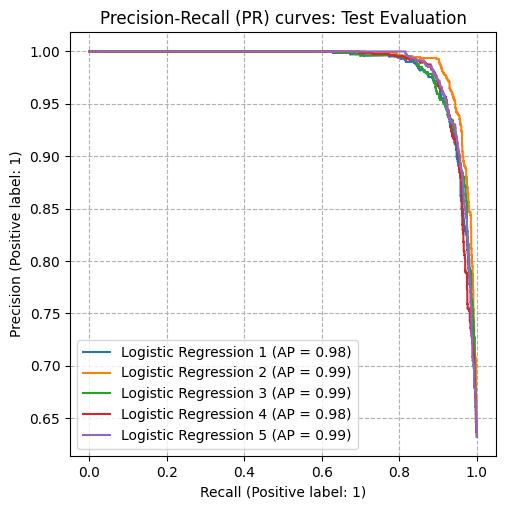

Test evaluation results:
[0.9845626358282107, 0.9902914060892903, 0.9859027337733485, 0.9848078629236882, 0.9865153370314096]
Average Precision Score against Test set: 98.64% (0.21%)

Running 5-model evaluation against the Environment set...

Environment test data loaded.


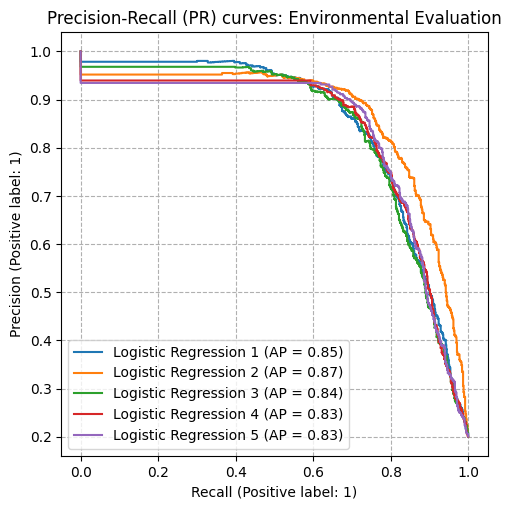

Environment evaluation results:
[0.8510726221718204, 0.8700321113829613, 0.8416066719700845, 0.8342297267272176, 0.8338042422976755]
Average Precision Score against Environment set: 84.61% (1.35%)


In [8]:
# run 5-fold CV with logistic regression, test against Test and Environment and print results
lr_cv, lr_test, lr_env = logistic_regression.run_cv()


Training data loaded.

Running 5-fold cross-validation...
CV results:
[0.99823229 0.99575442 0.97366083 0.98661076 0.98722136]
Average Precision Score for 5-fold CV: 98.83% (0.86%)

Running 5-model evaluation against Test set...

Test data loaded.



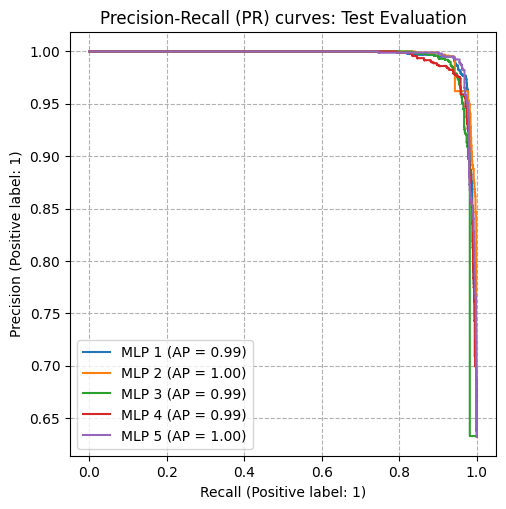

Test evaluation results:
[0.99482883334709, 0.9958938169419816, 0.9905864624146752, 0.9931030825989386, 0.995093331861041]
Average Precision Score against Test set: 99.39% (0.19%)

Running 5-model evaluation against the Environment set...

Environment test data loaded.


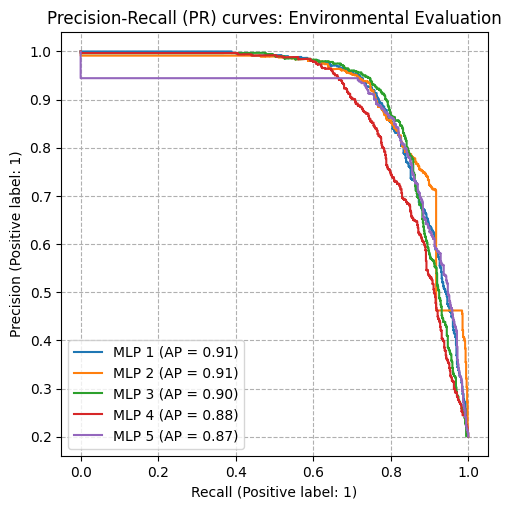

Environment evaluation results:
[0.9078388592185285, 0.9102595896416468, 0.9031512273525908, 0.8789636018508553, 0.8749201409381739]
Average Precision Score against Environment set: 89.50% (1.50%)


In [9]:
# run 5-fold CV with MLP, test against Test and Environment and print results
mlp_cv, mlp_test, mlp_env = mlp.run_cv(epochs=50)


Training data loaded.

Running 5-fold cross-validation...
CV results:
[0.99916189 0.99692792 0.99293344 0.98424889 0.98389489]
Average Precision Score for 5-fold CV: 99.14% (0.63%)

Running 5-model evaluation against Test set...

Test data loaded.



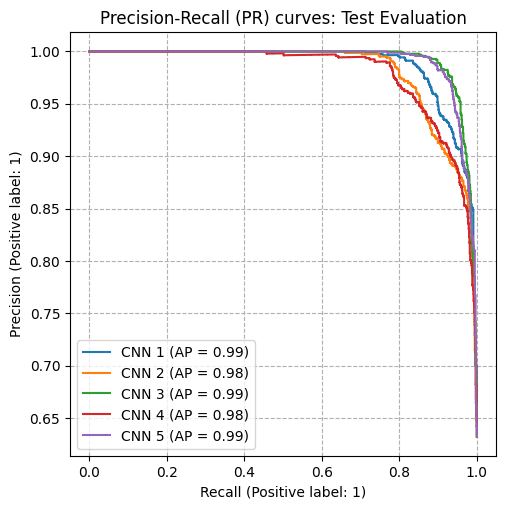

Test evaluation results:
[0.9870922360779459, 0.9809745022850247, 0.9920043133349478, 0.9792688321459101, 0.9908763938426897]
Average Precision Score against Test set: 98.60% (0.51%)

Running 5-model evaluation against the Environment set...

Environment test data loaded.


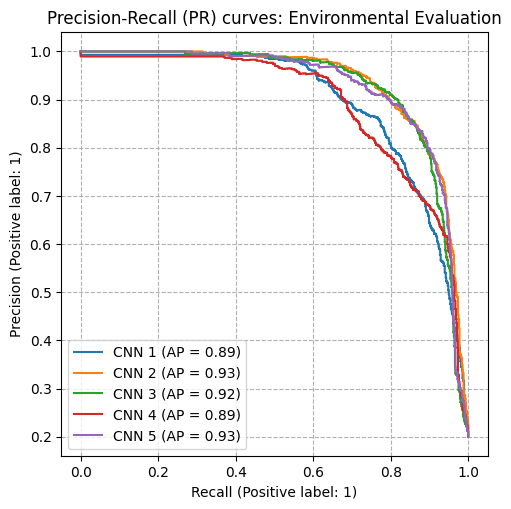

Environment evaluation results:
[0.8939572336585876, 0.933055889109778, 0.9247874580923665, 0.888662566853251, 0.9255268268878158]
Average Precision Score against Environment set: 91.32% (1.82%)


In [10]:
# run 5-fold CV with CNN, test against Test and Environment and print results
cnn_cv, cnn_test, cnn_env = cnn.run_cv(epochs=50)

In [11]:
lr_cv

(98.24242484546298,
 0.7657635832349304,
 array([0.99455903, 0.98832403, 0.97638235, 0.97526171, 0.97759412]))

In [12]:
mlp_cv

(98.82959317515413,
 0.8631812304946804,
 array([0.99823229, 0.99575442, 0.97366083, 0.98661076, 0.98722136]))

In [13]:
cnn_cv

(99.14334043583318,
 0.6334282363330593,
 array([0.99916189, 0.99692792, 0.99293344, 0.98424889, 0.98389489]))

In [14]:
lr_test

(98.64159951291894,
 0.2064613573117326,
 [0.9845626358282107,
  0.9902914060892903,
  0.9859027337733485,
  0.9848078629236882,
  0.9865153370314096])

In [15]:
mlp_test

(99.39011054327453,
 0.18908559373438216,
 [0.99482883334709,
  0.9958938169419816,
  0.9905864624146752,
  0.9931030825989386,
  0.995093331861041])

In [16]:
cnn_test

(98.60432555373038,
 0.5129890212057917,
 [0.9870922360779459,
  0.9809745022850247,
  0.9920043133349478,
  0.9792688321459101,
  0.9908763938426897])

In [17]:
lr_env

(84.61490749099518,
 1.3488809633214058,
 [0.8510726221718204,
  0.8700321113829613,
  0.8416066719700845,
  0.8342297267272176,
  0.8338042422976755])

In [18]:
mlp_env

(89.50266838003589,
 1.499664719084204,
 [0.9078388592185285,
  0.9102595896416468,
  0.9031512273525908,
  0.8789636018508553,
  0.8749201409381739])

In [19]:
cnn_env

(91.319799492036,
 1.818156121076505,
 [0.8939572336585876,
  0.933055889109778,
  0.9247874580923665,
  0.888662566853251,
  0.9255268268878158])

In [20]:
list(lr_cv[2]).index(max(list(lr_cv[2])))

0

In [21]:
def fetch_best_model_indexes(model, cv, test, env):
    
    cv = list(cv)

    cv_best = cv.index(max(cv))
    cv_worst = cv.index(min(cv))
    # print(cv_best)
    
    test_best = test.index(max(test))
    test_worst = test.index(min(test))
    # print(test_best)
    
    env_best = env.index(max(env))
    env_worst = env.index(min(env))
    # print(env_best)
    
    print(f'Model: {model}\nCV: Best {cv_best}, Worst {cv_worst}\nTEST: Best {test_best}, Worst {test_worst}\nENV: Best {env_best}, Worst {env_worst}')

In [22]:
fetch_best_model_indexes('Logistic regression', lr_cv[2], lr_test[2], lr_env[2])

Model: Logistic regression
CV: Best 0, Worst 3
TEST: Best 1, Worst 0
ENV: Best 1, Worst 4


In [23]:
fetch_best_model_indexes('MLP', mlp_cv[2], mlp_test[2], mlp_env[2])

Model: MLP
CV: Best 0, Worst 2
TEST: Best 1, Worst 2
ENV: Best 1, Worst 4


In [24]:
fetch_best_model_indexes('CNN', cnn_cv[2], cnn_test[2], cnn_env[2])

Model: CNN
CV: Best 0, Worst 4
TEST: Best 2, Worst 3
ENV: Best 1, Worst 3
